In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [109]:
from glob import glob
import os

def loadFile(file):
    name = os.path.splitext(os.path.split(file)[-1])[0]
    df = pd.read_csv(file, index_col="pow")
    return (name, df)

def transformThroughput(df: pd.DataFrame):
    powSeries = pd.Series([1 << i for i in df.index])
    powDf = pd.concat([powSeries for x in range(len(df.columns))], axis=1, keys=df.columns).set_index(df.index)
    return powDf / df

dfs = dict([loadFile(file) for file in glob("../../gpubtree/benchmark/_results/*.csv")])

def constructSuffixMap(suffix: str):
    sfx = "_" + suffix
    return { k.replace(sfx, ""): v for k, v in dfs.items() if k.endswith(sfx) }

def constructFrame(suffix: str, type: str):
    dfMap = constructSuffixMap(suffix)
    return pd.concat([v[type].rename(k) for k, v in dfMap.items()], axis=1)



Text(0, 0.5, 'Počet operací za sekundu')

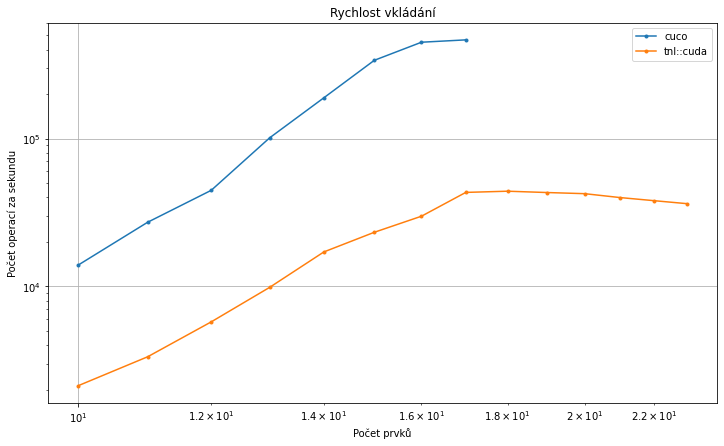

In [111]:
plot = transformThroughput(constructFrame("insert", "shuffle")).plot(title="Rychlost vkládání", figsize=(12, 7), grid=True, logy=True, logx=True, style='.-')
plot.set_xlabel("Počet prvků")
plot.set_ylabel("Počet operací za sekundu")


Text(0, 0.5, 'Počet operací za sekundu')

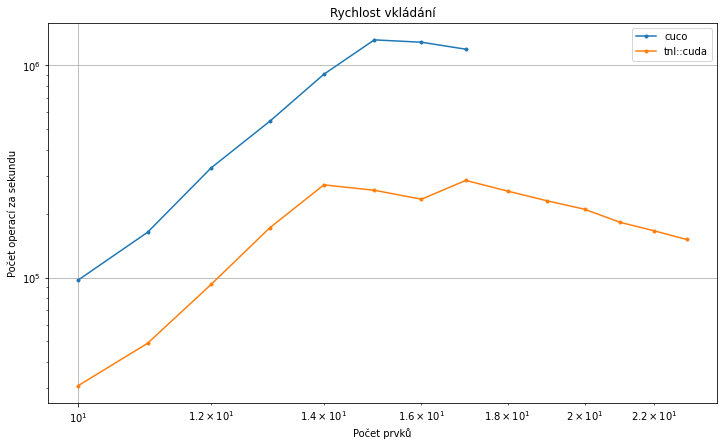

In [112]:
plot = transformThroughput(constructFrame("query", "shuffle")).plot(title="Rychlost vkládání", figsize=(12, 7), grid=True, logy=True, logx=True, style='.-')
plot.set_xlabel("Počet prvků")
plot.set_ylabel("Počet operací za sekundu")